<a href="https://colab.research.google.com/github/Mahendran180923/News_Senticonomy/blob/main/Senticonomy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Senticonomy

# **import dataset from kaggle**

In [ ]:
!pip install kaggle -q

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
!curl -L -o nyt-articles-21m-2000-present.zip https://www.kaggle.com/api/v1/datasets/download/aryansingh0909/nyt-articles-21m-2000-present


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  875M  100  875M    0     0  61.0M      0  0:00:14  0:00:14 --:--:-- 79.3M


In [ ]:
!unzip -q nyt-articles-21m-2000-present.zip

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/nyt-metadata.csv')
print(data.head())

<ipython-input-32-eb67b0e8ac3e>:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/nyt-metadata.csv')


                                            abstract  \
0  Article on upcoming New York Giants-Dallas Cow...   
1  Jeanne C Pond letter expresses hope that spiri...   
2  Many experts on Y2K computer problem report th...   
3  WILL the forces of globalism continue to push ...   
4   SPECIAL TODAY  The Millennium  Envisioning th...   

                                             web_url  \
0  https://www.nytimes.com/2000/01/01/sports/pro-...   
1  https://www.nytimes.com/2000/01/01/opinion/l-o...   
2  https://www.nytimes.com/2000/01/01/us/1-1-00-t...   
3  https://www.nytimes.com/2000/01/01/news/vision...   
4  https://www.nytimes.com/2000/01/01/nyregion/in...   

                                             snippet  \
0  Article on upcoming New York Giants-Dallas Cow...   
1  Jeanne C Pond letter expresses hope that spiri...   
2  Many experts on Y2K computer problem report th...   
3                                                NaN   
4                                             

In [ ]:
data.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section',
       'print_page', 'source', 'multimedia', 'headline', 'keywords',
       'pub_date', 'document_type', 'news_desk', 'section_name', 'byline',
       'type_of_material', '_id', 'word_count', 'uri', 'subsection_name'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
abstract,31917
web_url,1
snippet,196167
lead_paragraph,41988
print_section,746453
print_page,747701
source,1
multimedia,1
headline,1
keywords,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191517 entries, 0 to 2191516
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   abstract          object 
 1   web_url           object 
 2   snippet           object 
 3   lead_paragraph    object 
 4   print_section     object 
 5   print_page        object 
 6   source            object 
 7   multimedia        object 
 8   headline          object 
 9   keywords          object 
 10  pub_date          object 
 11  document_type     object 
 12  news_desk         object 
 13  section_name      object 
 14  byline            object 
 15  type_of_material  object 
 16  _id               object 
 17  word_count        float64
 18  uri               object 
 19  subsection_name   object 
dtypes: float64(1), object(19)
memory usage: 334.4+ MB


In [ ]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191517 entries, 0 to 2191516
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   abstract          object 
 1   web_url           object 
 2   snippet           object 
 3   lead_paragraph    object 
 4   print_section     object 
 5   print_page        object 
 6   source            object 
 7   multimedia        object 
 8   headline          object 
 9   keywords          object 
 10  pub_date          object 
 11  document_type     object 
 12  news_desk         object 
 13  section_name      object 
 14  byline            object 
 15  type_of_material  object 
 16  _id               object 
 17  word_count        float64
 18  uri               object 
 19  subsection_name   object 
dtypes: float64(1), object(19)
memory usage: 334.4+ MB


In [ ]:
df.isnull().sum()

,0
abstract,0
web_url,0
snippet,0
lead_paragraph,0
print_section,0
print_page,0
source,0
multimedia,0
headline,0
keywords,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370163 entries, 83 to 2191406
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   abstract          370163 non-null  object 
 1   web_url           370163 non-null  object 
 2   snippet           370163 non-null  object 
 3   lead_paragraph    370163 non-null  object 
 4   print_section     370163 non-null  object 
 5   print_page        370163 non-null  object 
 6   source            370163 non-null  object 
 7   multimedia        370163 non-null  object 
 8   headline          370163 non-null  object 
 9   keywords          370163 non-null  object 
 10  pub_date          370163 non-null  object 
 11  document_type     370163 non-null  object 
 12  news_desk         370163 non-null  object 
 13  section_name      370163 non-null  object 
 14  byline            370163 non-null  object 
 15  type_of_material  370163 non-null  object 
 16  _id               37016

In [ ]:
df.head()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name
83,"Gholam-Reza Hassani, the most conservative voi...",https://www.nytimes.com/2000/01/01/washington/...,"Gholam-Reza Hassani, the most conservative voi...","FOR some in the ancient world, where civilizat...",E,16.0,The New York Times,[],{'main': 'Praying for a Century That Is Not th...,"[{'name': 'glocations', 'value': 'Iran', 'rank...",2000-01-01 05:00:00+00:00,article,The Millennium,U.S.,"{'original': 'By John F. Burns', 'person': [{'...",News,nyt://article/56181a12-fe57-5a4c-a94b-49c73a70...,1246.0,nyt://article/56181a12-fe57-5a4c-a94b-49c73a70...,Politics
243,R W Apple Jr article on the prospects for Amer...,https://www.nytimes.com/2000/01/01/washington/...,R W Apple Jr article on the prospects for Amer...,"IT was Henry Luce, as every red-blooded Yankee...",E,2.0,The New York Times,[],"{'main': ""As the 'American Century' Extends It...","[{'name': 'subject', 'value': 'United States I...",2000-01-01 05:00:00+00:00,article,The Millennium,U.S.,"{'original': 'By R. W. Apple Jr', 'person': [{...",News,nyt://article/ffe406ba-af5f-5bd7-bbcd-5335ccb4...,1121.0,nyt://article/ffe406ba-af5f-5bd7-bbcd-5335ccb4...,Politics
269,"Article on Jonathan's Dream, fully-accessible ...",https://www.nytimes.com/2000/01/02/nyregion/a-...,"Article on Jonathan's Dream, fully-accessible ...","FOR a while, when he was younger, his wheelcha...",14CN,8.0,The New York Times,[],"{'main': ""A Playground With a Difference: It's...","[{'name': 'glocations', 'value': 'West Hartfor...",2000-01-02 05:00:00+00:00,article,Connecticut Weekly Desk,New York,"{'original': 'By Michelle M. Murphy', 'person'...",News,nyt://article/0ab4bb0a-4df7-5da3-b241-08ac7743...,1644.0,nyt://article/0ab4bb0a-4df7-5da3-b241-08ac7743...,Connecticut
355,June Pusbach O'Neill discusses her book The Gr...,https://www.nytimes.com/2000/01/02/nyregion/au...,June Pusbach O'Neill discusses her book The Gr...,WHEN June Pusbach O'Neill tells people that sh...,14WC,15.0,The New York Times,[],"{'main': 'Author Champions Sea Serpent', 'kick...","[{'name': 'glocations', 'value': 'New England ...",2000-01-02 05:00:00+00:00,article,Westchester Weekly Desk,New York,"{'original': 'By Patrick Huyghe', 'person': [{...",News,nyt://article/39eab464-bdc2-5b96-bf5a-893d8751...,1344.0,nyt://article/39eab464-bdc2-5b96-bf5a-893d8751...,Westchester
438,"Interview with June Pusbach O'Neill, author of...",https://www.nytimes.com/2000/01/02/nyregion/se...,"Interview with June Pusbach O'Neill, author of...",WHEN June Pusbach O'Neill tells people that sh...,14CN,17.0,The New York Times,[],{'main': 'Sea Serpent Fans Get a Book to Savor...,"[{'name': 'persons', 'value': 'Huyghe, Patrick...",2000-01-02 05:00:00+00:00,article,Connecticut Weekly Desk,New York,"{'original': 'By Patrick Huyghe', 'person': [{...",News,nyt://article/65e961e6-d8a2-5227-8bb6-c4e91ac4...,1257.0,nyt://article/65e961e6-d8a2-5227-8bb6-c4e91ac4...,Connecticut


In [ ]:
df.dropna(how='any', inplace=True)

In [ ]:
!pip install python-dateutil

In [ ]:
!pip install pytz

In [ ]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pytz


df['pub_date'] = pd.to_datetime(df['pub_date'])

# Calculate the date 10 years ago
five_years_ago = (datetime.now(pytz.UTC) - relativedelta(years=5))

# Filter the DataFrame to include only rows with pub_date within the last 10 years
df_filtered = df[df['pub_date'] >= five_years_ago]

# Print the first few rows of the filtered DataFrame
print(df_filtered.head())

                                                  abstract  \
2017977  The future role of the American Embassy in Kab...   
2017981  Readers offer their stories of coping: the cou...   
2017982  Jane Clementi, the mother of Tyler Clementi, d...   
2017983  Whole sectors of the United States economy hav...   
2017990  Many experts warn that an international health...   

                                                   web_url  \
2017977  https://www.nytimes.com/2020/03/22/us/politics...   
2017981  https://www.nytimes.com/2020/03/22/opinion/let...   
2017982  https://www.nytimes.com/2020/03/22/opinion/let...   
2017983  https://www.nytimes.com/2020/03/22/us/politics...   
2017990  https://www.nytimes.com/2020/03/22/us/politics...   

                                                   snippet  \
2017977  The future role of the American Embassy in Kab...   
2017981  Readers offer their stories of coping: the cou...   
2017982  Jane Clementi, the mother of Tyler Clementi, d...   
201798

# Save data as CSV file for 5 years data

In [ ]:
df_filtered.to_csv('news_data.csv')

In [ ]:
import os

file_size = os.path.getsize('news_data.csv')

if file_size < 1024:
    print(f"The size of the CSV file is: {file_size} bytes")
elif file_size < 1024 ** 2:
    print(f"The size of the CSV file is: {file_size / 1024:.2f} KB")
else:
    print(f"The size of the CSV file is: {file_size / (1024 ** 2):.2f} MB")

The size of the CSV file is: 147.04 MB


In [ ]:
df_filtered

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name
2017977,The future role of the American Embassy in Kab...,https://www.nytimes.com/2020/03/22/us/politics...,The future role of the American Embassy in Kab...,WASHINGTON — It was once a sideshow to the Ame...,A,15,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'As U.S. Troops Leave Afghanistan, Di...","[{'name': 'subject', 'value': 'United States I...",2020-03-22 15:21:16+00:00,article,Washington,U.S.,"{'original': 'By Lara Jakes', 'person': [{'fir...",News,nyt://article/66a7bd5a-4333-5152-83d1-cb611aab...,1420.0,nyt://article/66a7bd5a-4333-5152-83d1-cb611aab...,Politics
2017981,Readers offer their stories of coping: the cou...,https://www.nytimes.com/2020/03/22/opinion/let...,Readers offer their stories of coping: the cou...,On Saturday we ran a sampling of letters we re...,A,18,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'Weddings, Funerals and Life in Dire ...","[{'name': 'subject', 'value': 'Coronavirus (20...",2020-03-22 16:00:06+00:00,article,Letters,Opinion,"{'original': '', 'person': [], 'organization':...",Letter,nyt://article/78a2b562-dcb0-5139-bf33-2fd9642c...,936.0,nyt://article/78a2b562-dcb0-5139-bf33-2fd9642c...,Letters
2017982,"Jane Clementi, the mother of Tyler Clementi, d...",https://www.nytimes.com/2020/03/22/opinion/let...,"Jane Clementi, the mother of Tyler Clementi, d...",To the Editor:,A,18,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'I Lost My Son. Support L.G.B.T.Q. Yo...,"[{'name': 'subject', 'value': 'Federal Courts ...",2020-03-22 16:00:07+00:00,article,Letters,Opinion,"{'original': '', 'person': [], 'organization':...",Letter,nyt://article/c722e112-a6c4-52a0-bc1b-93123982...,479.0,nyt://article/c722e112-a6c4-52a0-bc1b-93123982...,Letters
2017983,Whole sectors of the United States economy hav...,https://www.nytimes.com/2020/03/22/us/politics...,Whole sectors of the United States economy hav...,WASHINGTON — The American economy has stopped ...,B,2,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'The U.S. Shut Down Its Economy. Here...,"[{'name': 'subject', 'value': 'Coronavirus (20...",2020-03-22 16:35:10+00:00,article,Washington,U.S.,"{'original': 'By Jim Tankersley', 'person': [{...",News,nyt://article/bd7d99f1-b618-50a3-889c-963a0632...,1447.0,nyt://article/bd7d99f1-b618-50a3-889c-963a0632...,Politics
2017990,Many experts warn that an international health...,https://www.nytimes.com/2020/03/22/us/politics...,Many experts warn that an international health...,WASHINGTON — When President Trump took the pod...,A,10,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Coronavirus Drives the U.S. and Chin...,"[{'name': 'subject', 'value': 'United States I...",2020-03-22 18:16:13+00:00,article,Washington,U.S.,"{'original': 'By Michael Crowley, Edward Wong ...",News,nyt://article/fe5642d5-bbca-56d5-9c31-1f851a03...,1687.0,nyt://article/fe5642d5-bbca-56d5-9c31-1f851a03...,Politics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191396,"Exchanges have taken place before, but this de...",https://www.nytimes.com/2024/12/30/world/europ...,"Exchanges have taken place before, but this de...",Russia and Ukraine announced on Monday that th...,A,10.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Russia and Ukraine Swap More Than 30...,"[{'name': 'subject', 'value': 'Prisons and Pri...",2024-12-30 17:57:00+00:00,article,Foreign,World,"{'original': 'By Nataliya Vasilyeva', 'person'...",News,nyt://article/22a2ac37-7b67-5afe-98e6-9dd8e69b...,445.0,nyt://article/22a2ac37-7b67-5afe-98e6-9dd8e69b...,Europe
2191398,Jimmy Carter’s daughter had an extraordinary a...,https://www.nytimes.com/

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42633 entries, 2017977 to 2191406
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   abstract          42633 non-null  object             
 1   web_url           42633 non-null  object             
 2   snippet           42633 non-null  object             
 3   lead_paragraph    42633 non-null  object             
 4   print_section     42633 non-null  object             
 5   print_page        42633 non-null  object             
 6   source            42633 non-null  object             
 7   multimedia        42633 non-null  object             
 8   headline          42633 non-null  object             
 9   keywords          42633 non-null  object             
 10  pub_date          42633 non-null  datetime64[ns, UTC]
 11  document_type     42633 non-null  object             
 12  news_desk         42633 non-null  object             
 13

# Data Cleaning/Preprocessing

In [ ]:
import pandas as pd


uncleaned_data = pd.read_csv('/content/news_data.csv')
cleaned_data = pd.DataFrame(uncleaned_data)

print(cleaned_data)

       Unnamed: 0                                           abstract  \
0         2017977  The future role of the American Embassy in Kab...   
1         2017981  Readers offer their stories of coping: the cou...   
2         2017982  Jane Clementi, the mother of Tyler Clementi, d...   
3         2017983  Whole sectors of the United States economy hav...   
4         2017990  Many experts warn that an international health...   
...           ...                                                ...   
42628     2191396  Exchanges have taken place before, but this de...   
42629     2191398  Jimmy Carter’s daughter had an extraordinary a...   
42630     2191403  Readers praise the former president’s accompli...   
42631     2191404  For much of the period since Election Day, the...   
42632     2191406  The episode comes at a particularly sensitive ...   

                                                 web_url  \
0      https://www.nytimes.com/2020/03/22/us/politics...   
1      https://

In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42633 entries, 0 to 42632
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        42633 non-null  int64  
 1   abstract          42633 non-null  object 
 2   web_url           42633 non-null  object 
 3   snippet           42633 non-null  object 
 4   lead_paragraph    42633 non-null  object 
 5   print_section     42633 non-null  object 
 6   print_page        42633 non-null  float64
 7   source            42633 non-null  object 
 8   multimedia        42633 non-null  object 
 9   headline          42633 non-null  object 
 10  keywords          42633 non-null  object 
 11  pub_date          42633 non-null  object 
 12  document_type     42633 non-null  object 
 13  news_desk         42633 non-null  object 
 14  section_name      42633 non-null  object 
 15  byline            42633 non-null  object 
 16  type_of_material  42633 non-null  object

In [ ]:
cleaned_data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42633 entries, 0 to 42632
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   abstract          42633 non-null  object 
 1   web_url           42633 non-null  object 
 2   snippet           42633 non-null  object 
 3   lead_paragraph    42633 non-null  object 
 4   print_section     42633 non-null  object 
 5   print_page        42633 non-null  float64
 6   source            42633 non-null  object 
 7   multimedia        42633 non-null  object 
 8   headline          42633 non-null  object 
 9   keywords          42633 non-null  object 
 10  pub_date          42633 non-null  object 
 11  document_type     42633 non-null  object 
 12  news_desk         42633 non-null  object 
 13  section_name      42633 non-null  object 
 14  byline            42633 non-null  object 
 15  type_of_material  42633 non-null  object 
 16  _id               42633 non-null  object

In [ ]:
cleaned_data['section_name'].unique()

array(['U.S.', 'Opinion', 'Sports', 'World', 'Business Day', 'Arts',
       'Well', 'Books', 'Fashion & Style', 'Food', 'Technology', 'Style',
       'Smarter Living', 'Real Estate', 'Science', 'Education',
       'Parenting', 'Your Money', 'T Magazine', 'Times Insider',
       'Podcasts'], dtype=object)

In [ ]:
cleaned_data['pub_date'] = pd.to_datetime(cleaned_data['pub_date'])

In [ ]:
cleaned_data['section_name'].value_counts()

,count
section_name,
World,10974
U.S.,9094
Arts,7289
Sports,6030
Business Day,2909
Books,2555
Opinion,2155
Well,737
Fashion & Style,354


In [ ]:
cleaned_data.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section',
       'print_page', 'source', 'multimedia', 'headline', 'keywords',
       'pub_date', 'document_type', 'news_desk', 'section_name', 'byline',
       'type_of_material', '_id', 'word_count', 'uri', 'subsection_name'],
      dtype='object')

In [ ]:
cleaned_data.drop(['print_section',  'print_page', 'document_type', 'byline', '_id', 'word_count', 'uri', 'multimedia'], axis=1, inplace=True)

In [ ]:
cleaned_data.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'source',
       'headline', 'keywords', 'pub_date', 'news_desk', 'section_name',
       'type_of_material', 'subsection_name'],
      dtype='object')

In [ ]:
print(cleaned_data['headline'].unique())

["{'main': 'As U.S. Troops Leave Afghanistan, Diplomats Are Left to Fill Uncertain Mission', 'kicker': None, 'content_kicker': None, 'print_headline': 'U.S. Troops’ Afghan Exit Ties Embassy’s Fate to a Fragile Peace Process', 'name': None, 'seo': None, 'sub': None}"
 "{'main': 'Weddings, Funerals and Life in Dire Times', 'kicker': 'letters', 'content_kicker': None, 'print_headline': 'Weddings, Funerals, Life in Dire Times', 'name': None, 'seo': None, 'sub': None}"
 "{'main': 'I Lost My Son. Support L.G.B.T.Q. Youth.', 'kicker': 'letters', 'content_kicker': None, 'print_headline': '', 'name': None, 'seo': None, 'sub': None}"
 ...
 "{'main': 'Jimmy Carter, the President and the Man', 'kicker': 'letters', 'content_kicker': None, 'print_headline': 'Jimmy Carter, the President and the Man', 'name': None, 'seo': None, 'sub': None}"
 "{'main': 'How Elon Musk Has Planted Himself Almost Literally at Trump’s Doorstep', 'kicker': None, 'content_kicker': None, 'print_headline': 'How Musk Has Plant

In [ ]:
import ast

cleaned_data['headline'] = cleaned_data['headline'].apply(lambda x: ast.literal_eval(x)['main'])


In [ ]:
import ast
# Convert the keywords column to a list of dictionaries and extract keyword values
cleaned_data['keywords'] = cleaned_data['keywords'].apply(lambda x: [d['value'] for d in ast.literal_eval(x)])


In [ ]:
cleaned_data['keywords'] = cleaned_data['keywords'].apply(lambda x: ' '.join(x))

In [ ]:
print(cleaned_data['keywords'])


0        United States International Relations United S...
1        Coronavirus (2019-nCoV) Funerals and Memorials...
2        Federal Courts (US) Teenagers and Adolescence ...
3        Coronavirus (2019-nCoV) United States Economy ...
4        United States International Relations China Co...
                               ...                        
42628    Prisons and Prisoners Russian Invasion of Ukra...
42629    Carter, Amy Carter, Jimmy United States Politi...
42630    Carter, Jimmy Presidents and Presidency (US) U...
42631    Presidential Election of 2024 United States Po...
42632    China Cyberwarfare and Defense Treasury Depart...
Name: keywords, Length: 42633, dtype: object


In [ ]:
print(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42633 entries, 0 to 42632
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   abstract          42633 non-null  object             
 1   web_url           42633 non-null  object             
 2   snippet           42633 non-null  object             
 3   lead_paragraph    42633 non-null  object             
 4   source            42633 non-null  object             
 5   headline          42633 non-null  object             
 6   keywords          42633 non-null  object             
 7   pub_date          42633 non-null  datetime64[ns, UTC]
 8   news_desk         42633 non-null  object             
 9   section_name      42633 non-null  object             
 10  type_of_material  42633 non-null  object             
 11  subsection_name   42633 non-null  object             
dtypes: datetime64[ns, UTC](1), object(11)
memory usage: 3.9+ MB


In [ ]:
cleaned_data['year'] = cleaned_data['pub_date'].dt.year
cleaned_data['month'] = cleaned_data['pub_date'].dt.month
cleaned_data['day'] = cleaned_data['pub_date'].dt.day
cleaned_data['day_of_week'] = cleaned_data['pub_date'].dt.day_name()
cleaned_data['time'] = cleaned_data['pub_date'].dt.time


In [ ]:
cleaned_data.drop('pub_date', axis=1, inplace=True)

In [ ]:
cleaned_data.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'source',
       'headline', 'keywords', 'news_desk', 'section_name', 'type_of_material',
       'subsection_name', 'year', 'month', 'day', 'day_of_week', 'time'],
      dtype='object')

In [ ]:
cleaned_data.isnull().sum()

,0
abstract,0
web_url,0
snippet,0
lead_paragraph,0
source,0
headline,0
keywords,0
news_desk,0
section_name,0
type_of_material,0


# Preprocessing of the data

In [ ]:
import pandas as pd
import ast


uncleaned_data = pd.read_csv('/content/news_data.csv')
cleaned_data = pd.DataFrame(uncleaned_data)


cleaned_data.drop(['Unnamed: 0','print_section',  'print_page', 'document_type', 'byline', '_id', 'word_count', 'uri', 'multimedia'], axis=1, inplace=True)

cleaned_data['pub_date'] = pd.to_datetime(cleaned_data['pub_date'])

cleaned_data['headline'] = cleaned_data['headline'].apply(lambda x: ast.literal_eval(x)['main'])

cleaned_data['keywords'] = cleaned_data['keywords'].apply(lambda x: [d['value'] for d in ast.literal_eval(x)])

cleaned_data['keywords'] = cleaned_data['keywords'].apply(lambda x: ' '.join(x))

cleaned_data['year'] = cleaned_data['pub_date'].dt.year
cleaned_data['month'] = cleaned_data['pub_date'].dt.month
cleaned_data['day'] = cleaned_data['pub_date'].dt.day
cleaned_data['day_of_week'] = cleaned_data['pub_date'].dt.day_name()
cleaned_data['time'] = cleaned_data['pub_date'].dt.time

cleaned_data.drop('pub_date', axis=1, inplace=True)

cleaned_data.isnull().sum()


,0
abstract,0
web_url,0
snippet,0
lead_paragraph,0
source,0
headline,0
keywords,0
news_desk,0
section_name,0
type_of_material,0


#  Create a pipeline with multiple vectorizers

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import numpy as np

pipeline = Pipeline([
    # ('abstract_vect',  TfidfVectorizer()),
    # # ('snippet_vect',  TfidfVectorizer()),
    ('lead_paragraph_vect',  TfidfVectorizer()),
    # ('headline_vect',  TfidfVectorizer()),
    ('section_name_vect', TfidfVectorizer())])

# x_abstract = pipeline.named_steps['abstract_vect'].fit_transform(cleaned_data['abstract'])
# x_snippet = pipeline.named_steps['snippet_vect'].fit_transform(cleaned_data['snippet'])
x_lead_paragraph = pipeline.named_steps['lead_paragraph_vect'].fit_transform(cleaned_data['lead_paragraph'])
# x_headline = pipeline.named_steps['headline_vect'].fit_transform(cleaned_data['headline'])
x_section_name = pipeline.named_steps['section_name_vect'].fit_transform(cleaned_data['section_name'])


x = np.concatenate((x_lead_paragraph.toarray(), x_section_name.toarray()), axis=1)

In [ ]:
import pandas as pd
df_enc = pd.DataFrame(x.toarray(),columns=vect.get_feature_names_out())
df_enc

NameError: name 'x' is not defined

In [ ]:
from sklearn.cluster import KMeans


model = KMeans(n_clusters=21)
cleaned_data['cluster'] = model.fit_predict(x)

In [ ]:
cleaned_data['cluster'].value_counts()

,count
cluster,
14,8802
16,4628
2,4033
3,3289
13,2993
7,2786
10,2451
5,2082
19,2040


In [ ]:
print(model.labels_)

[12  3 14 ... 16 19  2]


In [ ]:
model.predict(vect.transform(['Economic Rescue']))

array([14], dtype=int32)

In [ ]:
cleaned_data[cleaned_data['cluster'] == 14]

,abstract,web_url,snippet,lead_paragraph,source,headline,keywords,news_desk,section_name,type_of_material,subsection_name,cluster
2,6,https://www.nytimes.com/2020/03/22/opinion/let...,"Jane Clementi, the mother of Tyler Clementi, d...",To the Editor:,The New York Times,I Lost My Son. Support L.G.B.T.Q. Youth.,Federal Courts (US) Teenagers and Adolescence ...,Letters,Opinion,Letter,Letters,14
12,9,https://www.nytimes.com/2020/03/22/world/middl...,Critics accuse Prime Minister Benjamin Netanya...,"Citing a threat to Israeli democracy, opponent...",The New York Times,"Citing Threat to Israeli Democracy, Netanyahu ...","Israel Netanyahu, Benjamin Legislatures and Pa...",Foreign,World,News,Middle East,14
15,14,https://www.nytimes.com/2020/03/22/us/politics...,"As President Trump appears at daily briefings,...","Former Vice President Joseph R. Biden Jr., the...",The New York Times,Biden Addresses a Visibility Question: ‘How Do...,"Presidential Election of 2020 Biden, Joseph R ...",Politics,U.S.,News,Politics,14
20,8,https://www.nytimes.com/interactive/2020/03/23...,Much of the country has ground to a halt. But ...,Much of the country has ground to a halt. But ...,The New York Times,How Has Your State Reacted to Social Distancing?,Coronavirus (2019-nCoV) Medicine and Health Ep...,Opinion,Opinion,Interactive Feature,Sunday Review,14
29,9,https://www.nytimes.com/2020/03/23/world/europ...,"A jury found Mr. Salmond, who led the push for...","Alex Salmond, the former first minister of Sco...",The New York Times,"Alex Salmond, Scotland’s Ex-First Minister, Cl...","Salmond, Alex Decisions and Verdicts Sex Crime...",Foreign,World,News,Europe,14
...,...,...,...,...,...,...,...,...,...,...,...,...
42591,4,https://www.nytimes.com/2024/12/28/world/middl...,Finding the remnants of the old dictatorship a...,Syria’s new administration has stepped up its ...,The New York Times,Syria’s New Government Steps Up Pursuit of Ass...,Politics and Government War and Armed Conflict...,Foreign,World,News,Middle East,14
42597,15,https://www.nytimes.com/2024/12/29/world/asia/...,"With the war now over, the Taliban are welcomi...","Yi-Pin Lin, an associate professor at Tufts Un...",The New York Times,"Ignoring Warnings, a Growing Band of Tourists ...",Terrorism Travel and Vacations Afghanistan War...,Foreign,World,News,Asia Pacific,14
42603,6,https://www.nytimes.com/2024/12/29/opinion/let...,Readers discuss the possibility of Republicans...,To the Editor:,The New York Times,Democratic Fears of a Constitutional Convention,Illegal Immigration United States Politics and...,Letters,Opinion,Letter,Letters,14
42605,1,https://www.nytimes.com/2024/12/29/world/middl...,Even as battles with its enemies on its border...,"For years, the Houthis were the enemy most Isr...",The New York Times,Israel Struggles to Halt Attacks From Faraway ...,Israel-Gaza War (2023- ) International Relatio...,Foreign,World,News,Middle East,14


In [ ]:
wcss = []
for i in range(1, 21):
  model = KMeans(n_clusters=i)
  model.fit(x)
  wcss.append(model.inertia_)

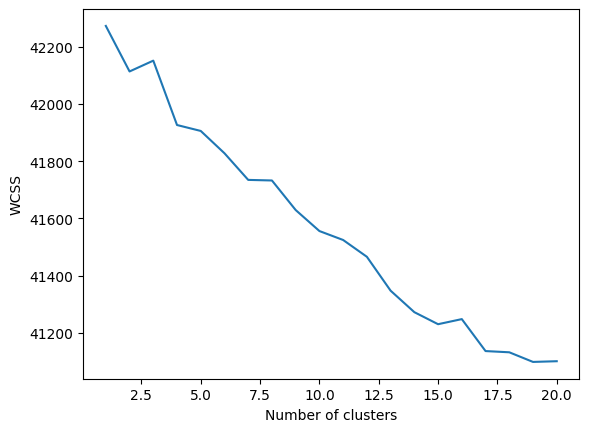

In [ ]:
from matplotlib import pyplot as plt

plt.plot(range(1, 21), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()